2025-01-28 01:28:54.251641: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-28 01:28:54.310493: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-28 01:28:54.313169: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-01-28 01:28:54.313179: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

Epoch 1/1000


2025-01-28 01:28:54.876995: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-28 01:28:54.877135: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-01-28 01:28:54.877160: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2025-01-28 01:28:54.877181: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2025-01-28 01:28:54.877199: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

826/826 - 1s - loss: 1.9125 - accuracy: 0.2410 - val_loss: 1.7387 - val_accuracy: 0.3200 - 572ms/epoch - 693us/step
Epoch 2/1000
826/826 - 0s - loss: 1.6728 - accuracy: 0.3391 - val_loss: 1.6822 - val_accuracy: 0.3200 - 306ms/epoch - 371us/step
Epoch 3/1000
826/826 - 0s - loss: 1.6411 - accuracy: 0.3515 - val_loss: 1.6684 - val_accuracy: 0.3457 - 296ms/epoch - 358us/step
Epoch 4/1000
826/826 - 0s - loss: 1.6303 - accuracy: 0.3513 - val_loss: 1.6587 - val_accuracy: 0.3494 - 301ms/epoch - 365us/step
Epoch 5/1000
826/826 - 0s - loss: 1.6181 - accuracy: 0.3563 - val_loss: 1.6311 - val_accuracy: 0.3524 - 302ms/epoch - 366us/step
Epoch 6/1000
826/826 - 0s - loss: 1.6050 - accuracy: 0.3626 - val_loss: 1.6088 - val_accuracy: 0.3654 - 291ms/epoch - 352us/step
Epoch 7/1000
826/826 - 0s - loss: 1.5885 - accuracy: 0.3644 - val_loss: 1.6099 - val_accuracy: 0.3657 - 302ms/epoch - 366us/step
Epoch 8/1000
826/826 - 0s - loss: 1.5735 - accuracy: 0.3733 - val_loss: 1.5689 - val_accuracy: 0.3739 - 284ms/

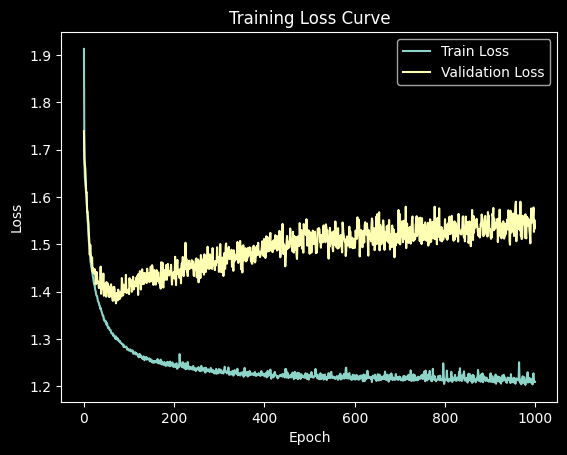

Train loss: 1.2501219511032104, Train accuracy: 0.5023618936538696
Test Loss: 1.5587773323059082, Test accuracy: 0.434835284948349


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt

# Load and preprocess data
data = fetch_california_housing()
X, y = data.data, data.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target to categorical (binned regression)
y_binned = pd.qcut(y, q=10, labels=False)  # Divide into 10 bins

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(20, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dense(20, activation='sigmoid'),
    Dense(20, activation='sigmoid'),
    Dense(20, activation='sigmoid'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.2, verbose=2)

# Plot Loss Curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Evaluate on Train Data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Train loss: {train_loss}, Train accuracy: {train_accuracy}")

# Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test accuracy: {test_accuracy}")